In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Helper functions

In [2]:
# function to group dataset by features when rows can belong to multiple groups
def groupby_many(data, groups):
    """
    Groups a Series or DataFrame object where each row can belong to many groups.

    Parameters
    ----------
    data : Series or DataFrame
        The data to group
    groups : iterable of iterables
        For each row in data, the groups that row belongs to.
        A row can belong to zero, one, or multiple groups.

    Returns
    -------
    A GroupBy object    
    """ 
    pairs = [(i, g) for (i, gg) in enumerate(groups) for g in gg]
    row, group = zip(*pairs)
    return data.iloc[list(row)].groupby(list(group))


def draw_plot1(year):
    df=movies_with_ratings
    df=df[df['year']==year]
    fig, axs = plt.subplots(2)
    groupby_many(df, df['genres'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['numVotes'][0:20].plot(kind='bar',ax=axs[0],color='tab:orange',legend=True)
    groupby_many(df, df['genres'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['averageRating'][0:20].plot(kind='bar',ax=axs[1],legend=True)
    for ax in fig.get_axes():
        ax.label_outer()
    plt.title('plot of best rated genres for each year')


def draw_plot2(genre):
    df=movies_with_ratings
    df=df[df['genres'].apply(lambda x: genre in x)]
    fig, axs = plt.subplots(2)
    groupby_many(df, df['countries'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['numVotes'][0:20].plot(kind='bar',ax=axs[0],color='tab:orange',legend=True)
    groupby_many(df, df['countries'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['averageRating'][0:20].plot(kind='bar',ax=axs[1],legend=True)
    for ax in fig.get_axes():
        ax.label_outer()
    plt.title('plot of best rated countries for each genre')


def draw_plot3(year):
    df=movies_with_revenues
    df=df[df['year']==year]
    fig, axs = plt.subplots(2)
    groupby_many(df, df['genres'])[['revenue', 'runtime']].mean().sort_values('revenue',ascending=False)['runtime'][0:20].plot(kind='bar',ax=axs[0],color='tab:blue',legend=True)
    groupby_many(df, df['genres'])[['revenue']].mean().sort_values('revenue',ascending=False)['revenue'][0:20].plot(kind='bar',ax=axs[1],color='tab:green',legend=True)

    for ax in fig.get_axes():
        ax.label_outer()

    plt.title('plot of richest genre of the year')


def draw_plot4(genre):
    df=movies_with_revenues
    df=df[df['genres'].apply(lambda x: genre in x)]
    fig, axs = plt.subplots(1)
    groupby_many(df, df['countries'])[['revenue']].mean().sort_values('revenue',ascending=False)['revenue'][0:20].plot(kind='bar',color='tab:red',legend=True)
    #groupby_many(df, df['countries'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['averageRating'][0:20].plot(kind='bar',ax=axs[1],legend=True)
    for ax in fig.get_axes():
        ax.label_outer()
    plt.title('Best countries for each genre')

### Loading the data and naming the columns 

In [3]:
path = 'MovieSummaries/'

character=pd.read_csv(path+'character.metadata.tsv',sep='\t',header=None, names=['wiki_movie_ID','Freebase_movie_ID','release_date','character_name','actor_birth','actor_gender','actor_height','actor_ethnicity','actor_name','actor_age','character_actor_map_ID','Freebase_character_ID','Freebase_actor_ID'])
cmu_movies = pd.read_csv(path+'movie.metadata.tsv',sep='\t',header=None,names=['wiki_movie_ID','Freebase_movie_ID','movie_name','date','revenue','runtime','languages','countries','genres'])
plot_summary = pd.read_csv(path+'plot_summaries.txt',sep='\t',header=None,names=['wiki_movie_ID','summary'])
imdb_movies = pd.read_csv(path+'imdb_title.tsv',sep='\t')
ratings = pd.read_csv(path+'rating.tsv',sep='\t')


C:\Users\41782\AppData\Local\Temp\ipykernel_48380\1658541648.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_movies = pd.read_csv(path+'imdb_title.tsv',sep='\t')


In [4]:
display('CHARACTERS:', character.head())
display('CMU MOVIES:',cmu_movies.head())
display('PLOT SUMMARIES:',plot_summary.head())
display('IMDB MOVIES:',imdb_movies.head())
display('RATINGS:',ratings.head())

'CHARACTERS:'

,wiki_movie_ID,Freebase_movie_ID,release_date,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


'CMU MOVIES:'

,wiki_movie_ID,Freebase_movie_ID,movie_name,date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


'PLOT SUMMARIES:'

,wiki_movie_ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


'IMDB MOVIES:'

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


'RATINGS:'

,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1734
3,tt0000004,5.6,174
4,tt0000005,6.2,2546


In [5]:
#   UNIQUE MOVIE NAMES
print('Number of different movie names in CMU dataset : ',len(cmu_movies.movie_name.unique()))
print('Number of different movie names in IMDb dataset : ',len(imdb_movies.originalTitle.unique()))

Number of different movie names in CMU dataset :  75478
Number of different movie names in IMDb dataset :  4306431


In [6]:
# Create 2 features for the month and the year of releasing of the movies
cmu_movies['month_day'] = cmu_movies['date'].apply(lambda x: x[5:] if len(str(x))>3 else np.nan)
cmu_movies['year'] = cmu_movies['date'].apply(lambda x: x[0:4] if len(str(x))>3 else x)
cmu_movies=cmu_movies.drop('date', axis = 1)

### Merging CMU and IMDB datasets

In [7]:
movies = cmu_movies.merge(imdb_movies,left_on=['movie_name', 'year'],right_on=['primaryTitle', 'startYear'], how="inner")
print('Size of the new dataset : ',movies.shape)


Size of the new dataset :  (61079, 19)


In [8]:
#adding the ratings feature
movies_with_ratings= movies.merge(ratings, left_on='tconst', right_on='tconst', how='inner')
print('Size of the dataset with the ratings : ', movies_with_ratings.shape)

Size of the dataset with the ratings :  (50834, 21)


In [9]:
movies_with_ratings.head()

,wiki_movie_ID,Freebase_movie_ID,movie_name,revenue,runtime,languages,countries,genres_x,month_day,year,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",08-24,2001,...,movie,Ghosts of Mars,Ghosts of Mars,0,2001,\N,98,"Action,Horror,Sci-Fi",4.9,55254
1,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",08-24,2001,...,tvEpisode,Ghosts of Mars,Ghosts of Mars,0,2001,\N,\N,"Documentary,Short",7.9,19
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",,1988,...,movie,Brun bitter,Brun bitter,0,1988,\N,83,"Crime,Drama",5.7,40
3,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",,1983,...,movie,A Woman in Flames,Die flambierte Frau,0,1983,\N,106,Drama,6.0,590
4,13696889,/m/03cfc81,The Gangsters,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",05-29,1913,...,short,The Gangsters,The Gangsters,0,1913,\N,35,"Comedy,Short",6.8,16


### Pre-process the data : clearing, normalizing 

In [10]:
#Dropping useless or redundant features
movies_with_ratings = movies_with_ratings.drop('genres_y', axis = 1)
movies_with_ratings = movies_with_ratings.rename(columns = {'genres_x':'genres'})
movies_with_ratings = movies_with_ratings.drop('Freebase_movie_ID', axis = 1)
movies_with_ratings = movies_with_ratings.drop('primaryTitle', axis = 1)
movies_with_ratings = movies_with_ratings.drop('originalTitle', axis = 1)
movies_with_ratings = movies_with_ratings.drop('runtimeMinutes', axis = 1)
movies_with_ratings = movies_with_ratings.drop('startYear', axis = 1)

movies_with_ratings['year']=movies_with_ratings['year'].astype(int)

In [11]:
#Remove the 'key' part of languages, countries and genres features
movies_with_ratings['languages'] = movies_with_ratings['languages'].apply(lambda x: list(json.loads(x).values()))
movies_with_ratings['countries'] = movies_with_ratings['countries'].apply(lambda x: list(json.loads(x).values()))
movies_with_ratings['genres'] = movies_with_ratings['genres'].apply(lambda x: list(json.loads(x).values()))

In [12]:
print('The percentage of null values for the feature endYear is', np.array(movies_with_ratings.endYear == '\\N').sum()/movies_with_ratings.shape[0])

The percentage of null values for the feature endYear is 0.993390250619664


The percentage of rows containing the feature endYear is very low, so we remove this feature.

In [13]:
movies_with_ratings = movies_with_ratings.drop('endYear', axis = 1)

In [14]:
# Dropping movies with less than 20 vote numbers for a credible ratings analysis
movies_with_ratings = movies_with_ratings[movies_with_ratings['numVotes']>= 20]

In [15]:
movies_with_ratings.head()

,wiki_movie_ID,movie_name,revenue,runtime,languages,countries,genres,month_day,year,tconst,titleType,isAdult,averageRating,numVotes
0,975900,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",08-24,2001,tt0228333,movie,0,4.9,55254
2,28463795,Brun bitter,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",,1988,tt0094806,movie,0,5.7,40
3,261236,A Woman in Flames,NaN,106.0,[German Language],[Germany],[Drama],,1983,tt0083949,movie,0,6.0,590
5,10408933,Alexander's Ragtime Band,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",08-16,1938,tt0029852,movie,0,6.9,2159
6,175026,Sarah and Son,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]",,1930,tt0021335,movie,0,5.4,272


#### We will now check for non unicity of the movies in the dataset:

In [16]:
duplicates = movies_with_ratings.loc[movies_with_ratings.duplicated(subset=['wiki_movie_ID', 'titleType'], keep = False)]

In [17]:
duplicates.head()

,wiki_movie_ID,movie_name,revenue,runtime,languages,countries,genres,month_day,year,tconst,titleType,isAdult,averageRating,numVotes
76,7707787,Carmen,NaN,119.0,"[French Language, Spanish Language]",[Spain],"[Romantic drama, Romance Film, Drama, World ci...",10-03,2003,tt0352230,movie,0,6.1,2176
77,7707787,Carmen,NaN,119.0,"[French Language, Spanish Language]",[Spain],"[Romantic drama, Romance Film, Drama, World ci...",10-03,2003,tt0372361,movie,0,6.2,162
85,7460227,The Bridge,NaN,69.0,[English Language],[United States of America],[Drama],09-01,2006,tt0799954,movie,0,7.2,11719
86,4953051,The Bridge,NaN,94.0,[English Language],"[United States of America, United Kingdom]",[Documentary],,2006,tt0799954,movie,0,7.2,11719
87,7460227,The Bridge,NaN,69.0,[English Language],[United States of America],[Drama],09-01,2006,tt0907842,movie,0,7.6,171


We will consider as duplicates the movies having same title and titleType. Our strategy is to drop duplicates, keeping the movie with the highest 'popularity', i.e. highest vote count

In [18]:
for i in range(len(duplicates.wiki_movie_ID.unique())):# for loop per each duplicate
    orig = movies_with_ratings[movies_with_ratings.wiki_movie_ID == duplicates.wiki_movie_ID.unique()[i]] # find them in the original dataset
    movies_with_ratings = movies_with_ratings.drop(list(orig[orig.numVotes !=orig.numVotes.max()].index)) # drop rows that don't have the maximum number of votes


In [19]:
#there are movies with the same Id but different titleType and rating
movies_with_ratings.loc[movies_with_ratings.duplicated(subset=['wiki_movie_ID'], keep = False)].head()

,wiki_movie_ID,movie_name,revenue,runtime,languages,countries,genres,month_day,year,tconst,titleType,isAdult,averageRating,numVotes
130,11692389,The Snow Queen,NaN,90.0,[English Language],"[Canada, United Kingdom]","[Family Film, Fantasy, Adventure]",12-24,2005,tt0450152,short,0,7.8,81
131,11692389,The Snow Queen,NaN,90.0,[English Language],"[Canada, United Kingdom]","[Family Film, Fantasy, Adventure]",12-24,2005,tt0469828,tvMovie,0,6.0,426
132,11692389,The Snow Queen,NaN,90.0,[English Language],"[Canada, United Kingdom]","[Family Film, Fantasy, Adventure]",12-24,2005,tt1343074,tvSeries,0,7.0,20
173,4459059,Trial and Error,14598571.0,99.0,[English Language],[United States of America],"[Romantic comedy, Romance Film, Slapstick, Com...",05-30,1997,tt0120373,movie,0,5.8,7595
174,4459059,Trial and Error,14598571.0,99.0,[English Language],[United States of America],"[Romantic comedy, Romance Film, Slapstick, Com...",05-30,1997,tt0677869,tvEpisode,0,7.8,131


####  Let's standardize the features

In [20]:
# COLUMNS = ['revenue', 'numVotes']

# for i in range(len(COLUMNS)):
#     movies_with_ratings[COLUMNS] = (movies_with_ratings[COLUMNS] - movies_with_ratings[COLUMNS].min())/(movies_with_ratings[COLUMNS].max()-movies_with_ratings[COLUMNS].min())



### Visualization of the data

In [21]:
#plot of the top 20 languages for number of votings and corresponding ratings
languages_20 = groupby_many(movies_with_ratings, movies_with_ratings['languages'])[['numVotes','averageRating']].mean().sort_values('numVotes', ascending=False)[0:20]
languages_20.head()


,numVotes,averageRating
Old English language,914782.75,7.975000
Hmong language,774319.00,8.100000
Sicilian Language,615711.00,7.433333
Krio Language,549273.00,8.000000
Chewa language,340710.50,5.800000


#### Distributions

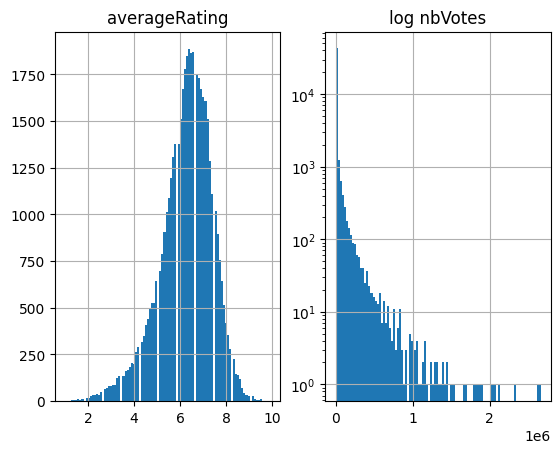

In [22]:
fig, axes = plt.subplots(1, 2)

movies_with_ratings.averageRating.hist(bins=100,ax=axes[0])
movies_with_ratings.numVotes.hist(bins=100,ax=axes[1], log=True)
axes[0].set_title('averageRating')
axes[1].set_title('log nbVotes')
plt.show()

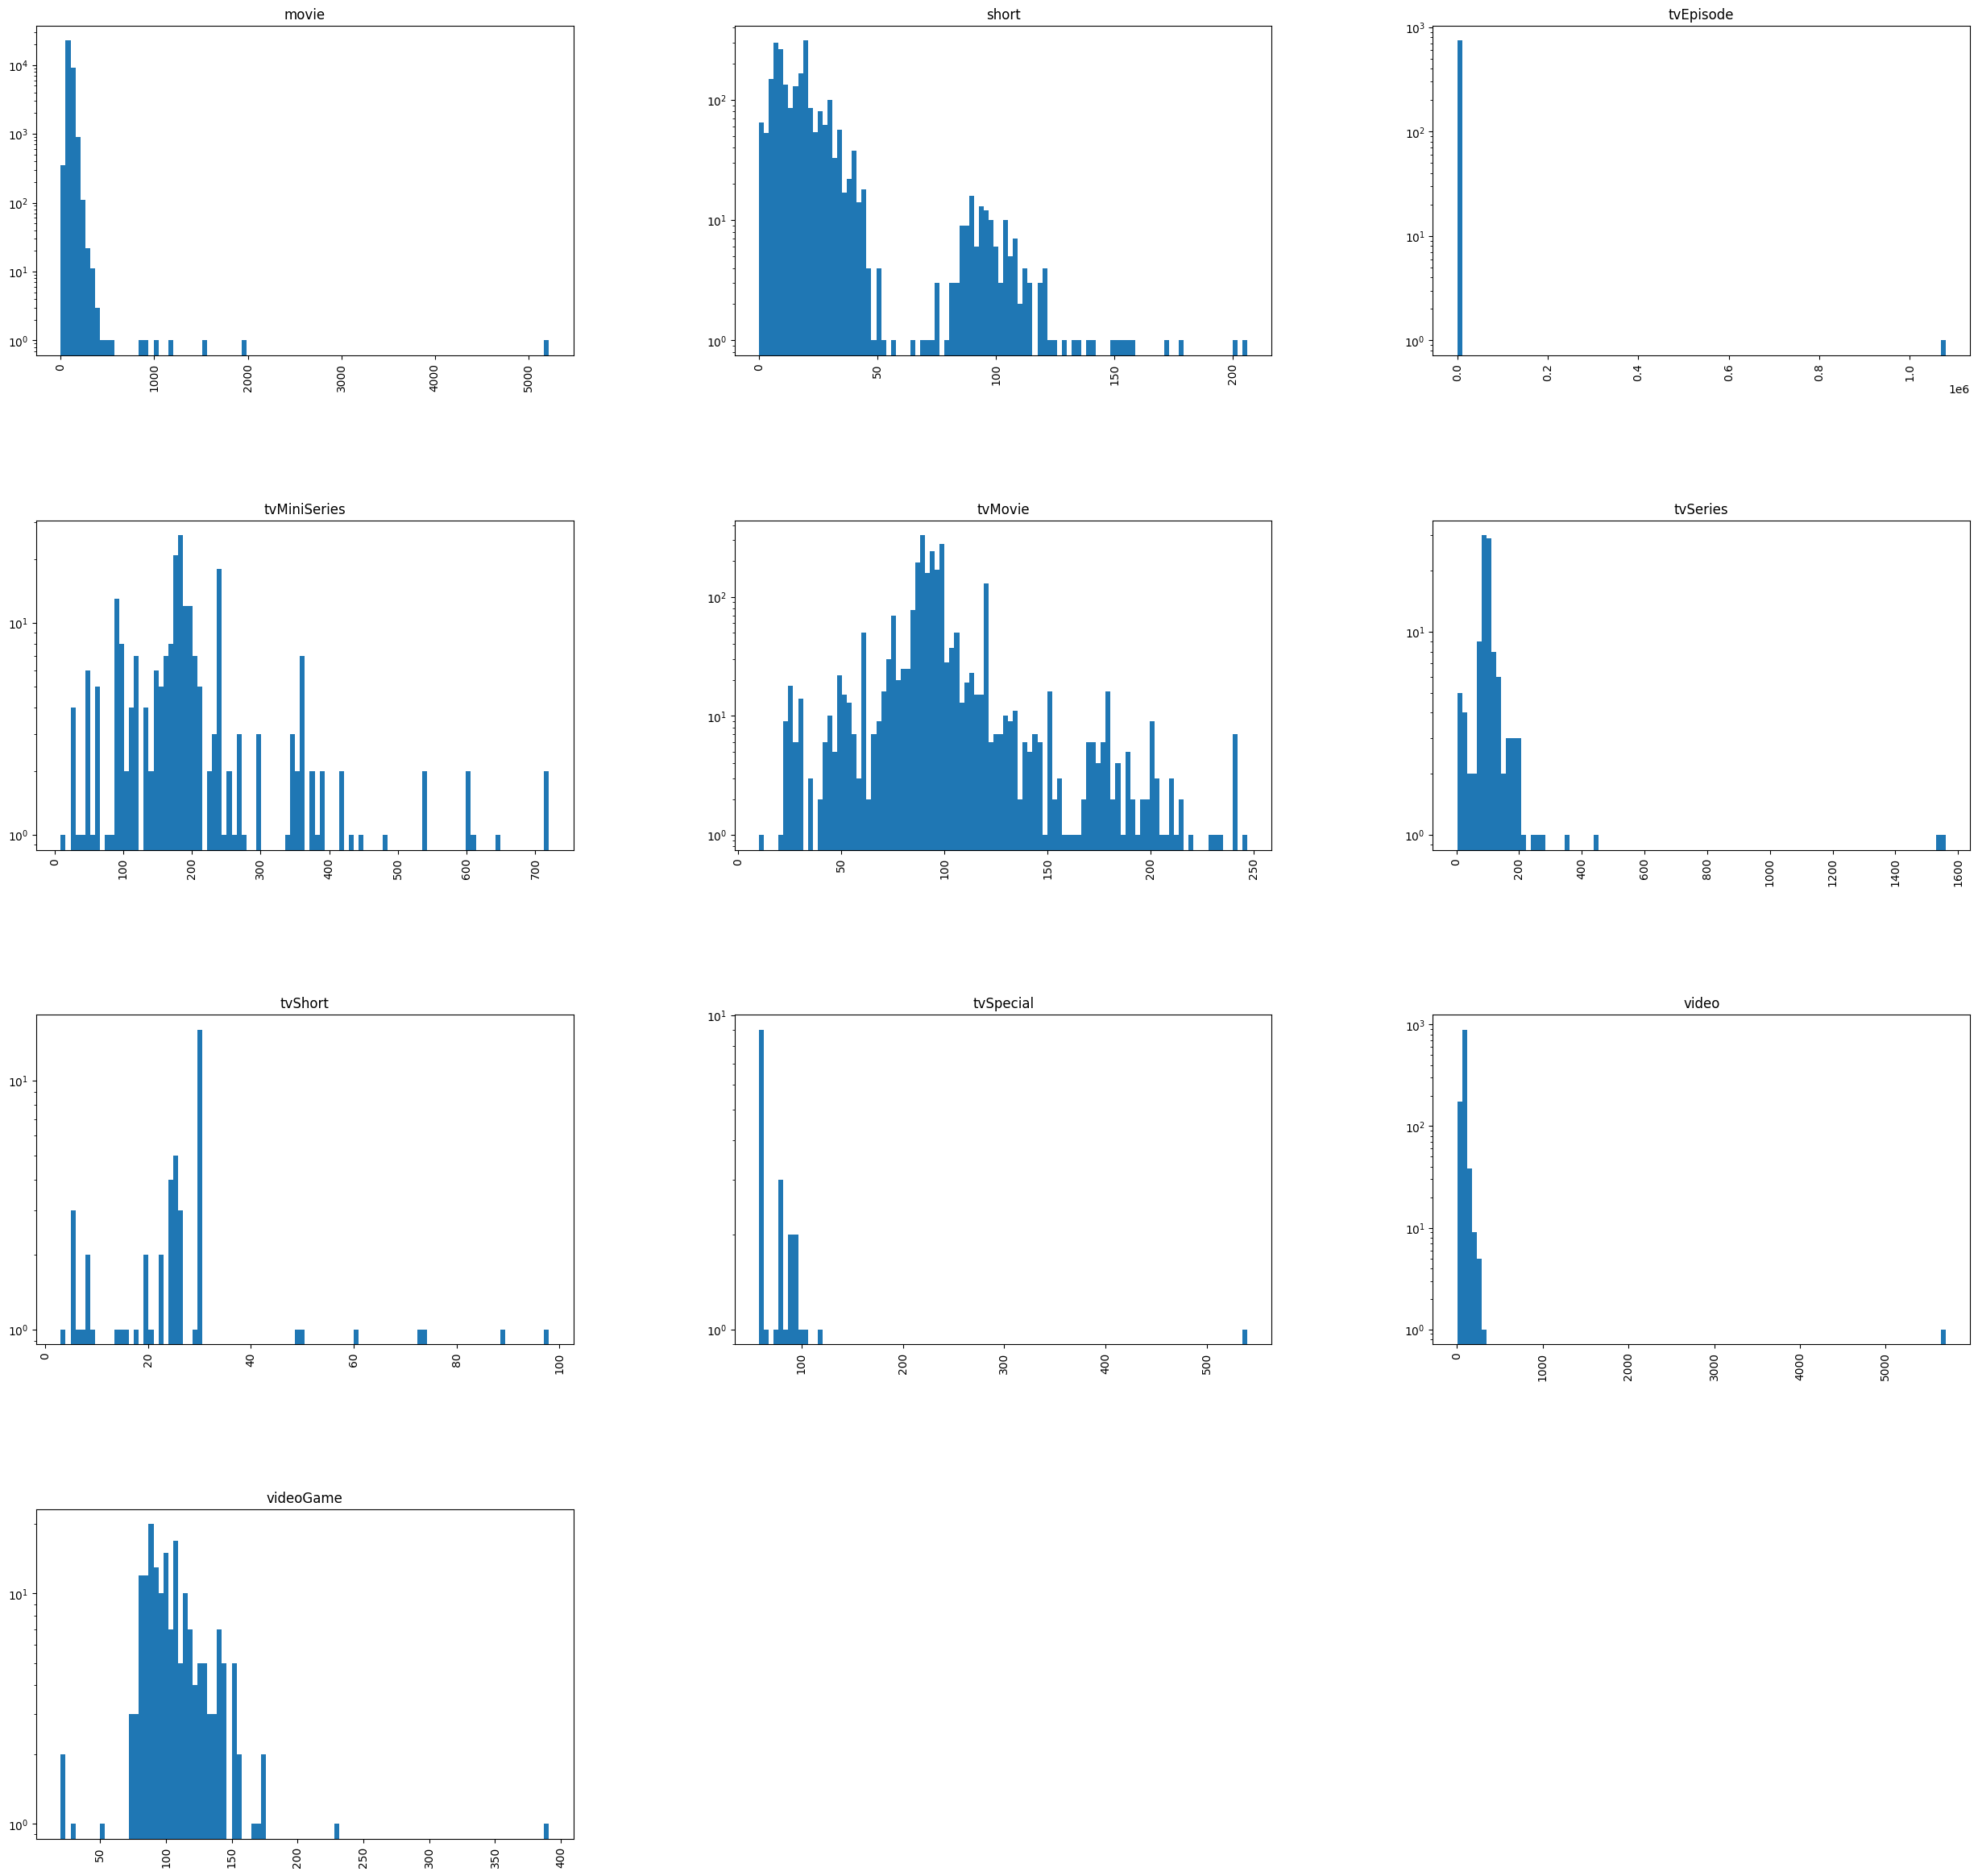

In [23]:
movies_with_ratings['runtime'].hist(bins=100,by=movies_with_ratings['titleType'],log=True,figsize=(30,30))
plt.title('Runtime')
plt.show()

#### Top languages, countries, and genres

Text(0.5, 1.0, 'plot of 10 best rated languages')

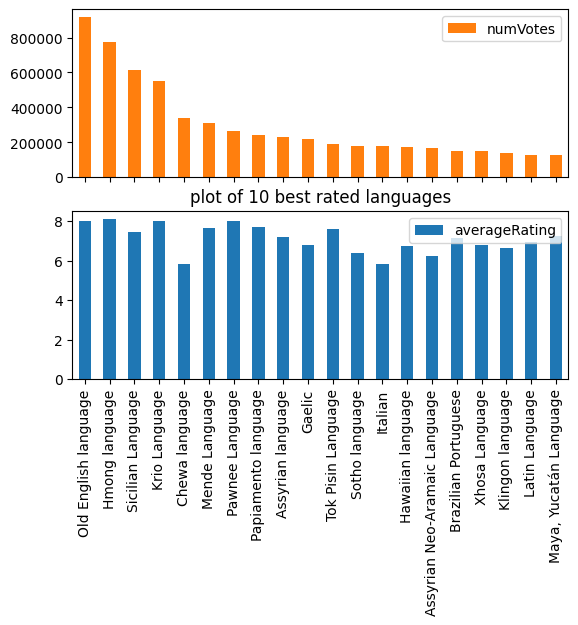

In [24]:
fig, axs = plt.subplots(2)
groupby_many(movies_with_ratings, movies_with_ratings['languages'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['numVotes'][0:20].plot(kind='bar',ax=axs[0],color='tab:orange',legend=True)
groupby_many(movies_with_ratings, movies_with_ratings['languages'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['averageRating'][0:20].plot(kind='bar',ax=axs[1],legend=True)
for ax in fig.get_axes():
    ax.label_outer()

plt.title('plot of 10 best rated languages')


Text(0.5, 1.0, 'plot of 10 best rated countries')

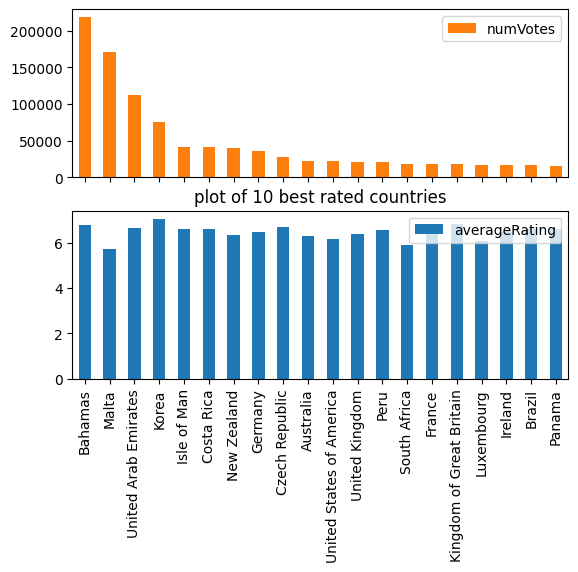

In [25]:
#groupby_many(movies_with_ratings, movies_with_ratings['countries'])[['averageRating', 'numVotes']].mean().sort_values('numVotes', ascending=False)[0:20].plot(kind='bar')
#plt.title('plot of 10 best rated countries')

fig, axs = plt.subplots(2)
groupby_many(movies_with_ratings, movies_with_ratings['countries'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['numVotes'][0:20].plot(kind='bar',ax=axs[0],color='tab:orange',legend=True)
groupby_many(movies_with_ratings, movies_with_ratings['countries'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['averageRating'][0:20].plot(kind='bar',ax=axs[1],legend=True)
for ax in fig.get_axes():
    ax.label_outer()

plt.title('plot of 10 best rated countries')

Text(0.5, 1.0, 'plot of 10 best rated genres')

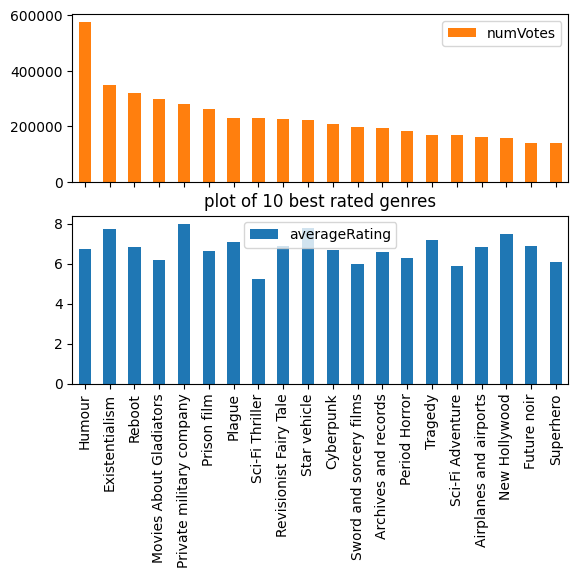

In [26]:
fig, axs = plt.subplots(2)
groupby_many(movies_with_ratings, movies_with_ratings['genres'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['numVotes'][0:20].plot(kind='bar',ax=axs[0],color='tab:orange',legend=True)
groupby_many(movies_with_ratings, movies_with_ratings['genres'])[['averageRating','numVotes']].mean().sort_values('numVotes',ascending=False)['averageRating'][0:20].plot(kind='bar',ax=axs[1],legend=True)
for ax in fig.get_axes():
    ax.label_outer()

plt.title('plot of 10 best rated genres')




#### Each year's best genre

In [27]:
import ipywidgets as widgets
from ipywidgets import interact
slider=widgets.IntSlider(min=movies_with_ratings['year'].min(),max=movies_with_ratings['year'].max(),description='year')

interact(draw_plot1,year=slider)
#display(slider,out)

interactive(children=(IntSlider(value=1888, description='year', max=2016, min=1888), Output()), _dom_classes=(…

<function __main__.draw_plot1(year)>

#### The best countries for each genre

In [28]:
pairs = [(i, g) for (i, gg) in enumerate(movies_with_ratings['genres']) for g in gg]
row, group = zip(*pairs)
group=np.unique(group)
dd= widgets.Dropdown(options=group,value=group[0],description='Select a genre')

interact(draw_plot2,genre=dd)
#display(slider,out)

interactive(children=(Dropdown(description='Select a genre', options=('Absurdism', 'Acid western', 'Action', '…

<function __main__.draw_plot2(genre)>

### A capitalist point of view

In [29]:
movies_with_revenues=cmu_movies[cmu_movies.revenue>0]
movies_with_revenues.shape

(8401, 10)

In [30]:
pd.options.mode.chained_assignment = None

#Remove the 'key' part of languages, countries and genres features
movies_with_revenues['languages'] = movies_with_revenues['languages'].apply(lambda x: list(json.loads(x).values()))
movies_with_revenues['countries'] = movies_with_revenues['countries'].apply(lambda x: list(json.loads(x).values()))
movies_with_revenues['genres'] = movies_with_revenues['genres'].apply(lambda x: list(json.loads(x).values()))

In [31]:
#Movies missing a starting year
movies_with_revenues[movies_with_revenues.year.isnull()].shape[0]

73

In [32]:
movies_with_revenues.dropna(subset=['runtime'], inplace=True)


Hence dropping 73 rows will not affect the data size drastically

In [33]:
#Droping unnecessary column and rows
movies_with_revenues = movies_with_revenues.drop('Freebase_movie_ID', axis = 1)


In [34]:
movies_with_revenues.dropna(subset=['year'], inplace=True)
movies_with_revenues['year']=movies_with_revenues['year'].astype(int)


checking for duplicates

In [35]:
duplicates3 = movies_with_revenues.loc[movies_with_revenues.duplicated(subset=['wiki_movie_ID', 'year'], keep = False)]
duplicates3.shape[0]
# Free of duplicates!

0

#### Simple statistics

In [36]:
movies_with_revenues.revenue.describe()

count    8.243000e+03
mean     4.842942e+07
std      1.127302e+08
min      1.000000e+04
25%      2.136522e+06
50%      1.089022e+07
75%      4.149600e+07
max      2.782275e+09
Name: revenue, dtype: float64

With an average revenue of order 10^7 and a minimum of order 10^4, we will convert the revenues to a scale of millions by dividing by 6

In [37]:
movies_with_revenues.revenue= movies_with_revenues.revenue/1000000

### Visualization

Text(0.5, 0, 'Million $')

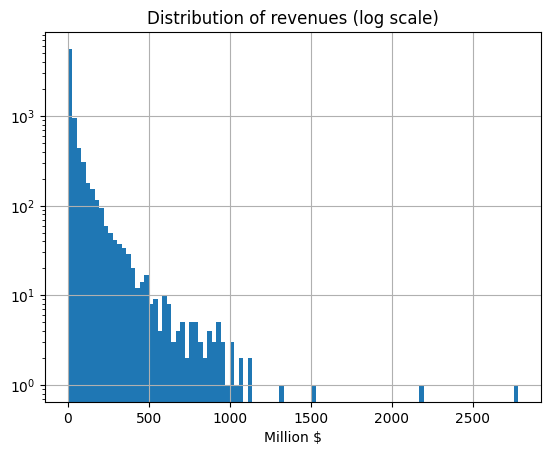

In [38]:
movies_with_revenues.revenue.hist(bins=100, log=True)
plt.title("Distribution of revenues (log scale)")
plt.xlabel("Million $")



In [39]:
#plot of the top 20 languages with highest revenues
lang20 = groupby_many(movies_with_revenues, movies_with_revenues['languages'])[['revenue']].mean().sort_values('revenue', ascending=False)[0:20]
lang20.head()


,revenue
Old English language,747.456792
Amharic Language,611.899420
Assyrian language,611.899420
Swiss German Language,485.930816
Pawnee Language,424.208848


Correlation between runtime and revenue (for normal timed movies: 50-200 minutes)

In [40]:
normal_time_movies= movies_with_revenues[((movies_with_revenues.runtime>=50) & (movies_with_revenues.runtime<=200))]
normal_time_movies.shape

(8190, 9)

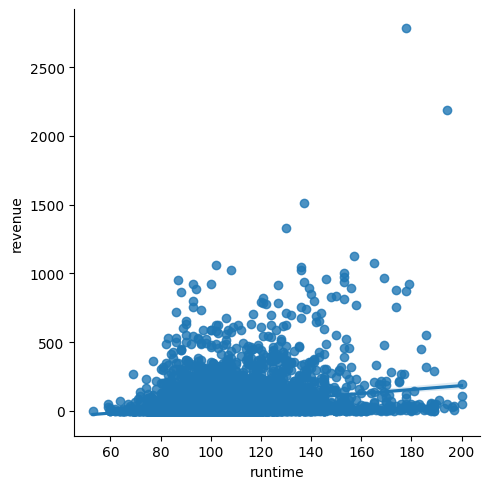

In [41]:
sns.lmplot(x='runtime', y='revenue', data=normal_time_movies[['revenue', 'runtime']])
plt.show()

In [42]:
#Linear dependence
normal_time_movies[['revenue', 'runtime']].corr()

,revenue,runtime
revenue,1.000000,0.231277
runtime,0.231277,1.000000


In [43]:
#Strength of association (spearman's correlation)
normal_time_movies.revenue.corr(normal_time_movies.runtime, method='spearman')

0.2927023228401962

#### 'Richest' genres, languages, and countries

Text(0.5, 1.0, 'Top 20 genres with highest revenue')

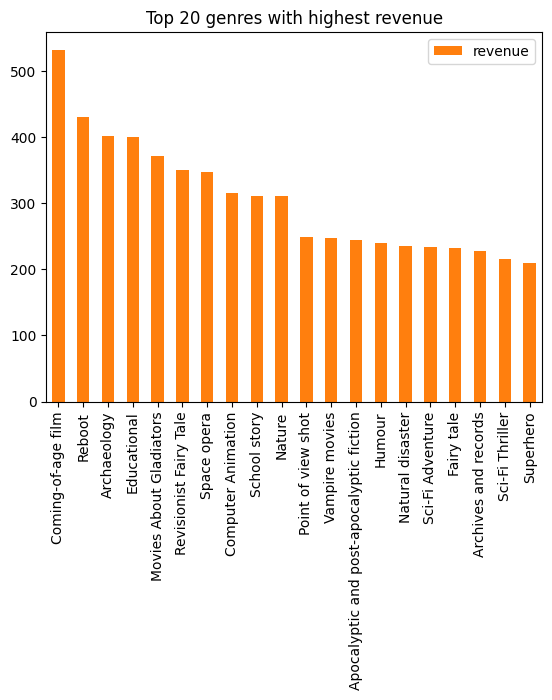

In [44]:
fig, axs = plt.subplots(1)
groupby_many(movies_with_revenues, movies_with_revenues['genres'])[['revenue']].mean().sort_values('revenue',ascending=False)['revenue'][0:20].plot(kind='bar',color='tab:orange',legend=True)

plt.title('Top 20 genres with highest revenue')


Text(0.5, 1.0, 'Top 20 languages with highest revenue')

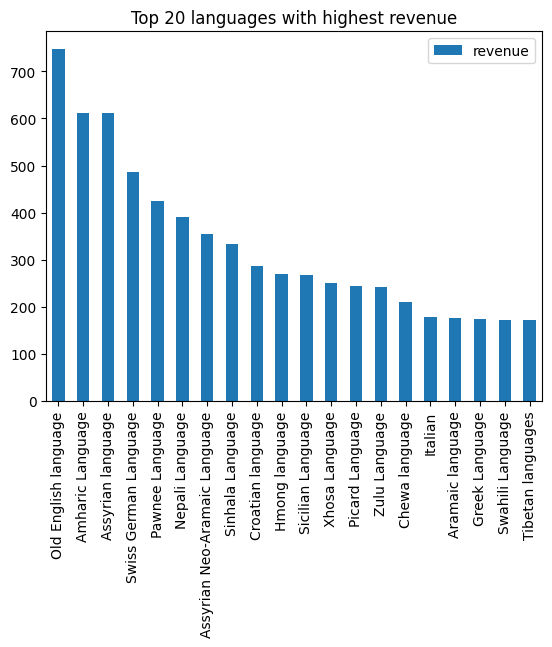

In [45]:
fig, axs = plt.subplots(1)
groupby_many(movies_with_revenues, movies_with_revenues['languages'])[['revenue']].mean().sort_values('revenue',ascending=False)['revenue'][0:20].plot(kind='bar',legend=True)

plt.title('Top 20 languages with highest revenue')


Text(0.5, 1.0, 'Top 20 countries with highest revenue')

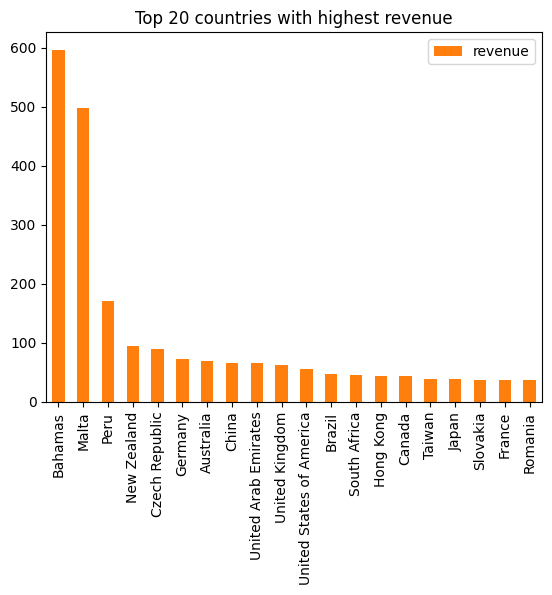

In [46]:
fig, axs = plt.subplots(1)
groupby_many(movies_with_revenues, movies_with_revenues['countries'])[['revenue']].mean().sort_values('revenue',ascending=False)['revenue'][0:20].plot(kind='bar',color='tab:orange',legend=True)

plt.title('Top 20 countries with highest revenue')


#### Each year's best genre with the average runtime

In [47]:
slider=widgets.IntSlider(min=1920,max=movies_with_revenues['year'].max(),description='year')

interact(draw_plot3,year=slider)
#display(slider,out)

interactive(children=(IntSlider(value=1920, description='year', max=2012, min=1920), Output()), _dom_classes=(…

<function __main__.draw_plot3(year)>

#### The best country for each genres

In [48]:
pairs = [(i, g) for (i, gg) in enumerate(movies_with_revenues['genres']) for g in gg]
row, group = zip(*pairs)
group=np.unique(group)
dd= widgets.Dropdown(options=group,value=group[0],description='Select a genre')


interact(draw_plot4,genre=dd)
#display(slider,out)

interactive(children=(Dropdown(description='Select a genre', options=('Absurdism', 'Acid western', 'Action', '…

<function __main__.draw_plot4(genre)>